In [19]:
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#!jupyter serverextension enable voila --sys-prefix

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_excel("customer_churn_data.xlsx", engine='openpyxl')
data.isnull().sum()

Customer                     81
umur berlangganan            81
tipe layanan                 81
lama kontrak                 81
Layanan IPTV                 81
layanan add on               81
tagihan bulanan             450
besar dowload perbulan       81
Nilai kepuasan pelanggan     81
keterangan churn             81
dtype: int64

In [21]:
rata_tagihan_bulanan = data['tagihan bulanan'].mean()
data['tagihan bulanan'] = data['tagihan bulanan'].fillna(rata_tagihan_bulanan)
data.isnull().sum()

Customer                    81
umur berlangganan           81
tipe layanan                81
lama kontrak                81
Layanan IPTV                81
layanan add on              81
tagihan bulanan              0
besar dowload perbulan      81
Nilai kepuasan pelanggan    81
keterangan churn            81
dtype: int64

In [22]:
data.loc[data['Layanan IPTV'] == 'Yes', 'Layanan IPTVx'] = 1 
data.loc[data['Layanan IPTV'] == 'No', 'Layanan IPTVx'] = 0 
data.loc[data['layanan add on'] == 'Yes', 'layanan add onx'] = 1 
data.loc[data['layanan add on'] == 'No', 'layanan add onx'] = 0 
data.loc[data['keterangan churn'] == 'Yes', 'keterangan churnx'] = 1 
data.loc[data['keterangan churn'] == 'No', 'keterangan churnx'] = 0 
data.loc[data['tipe layanan'] == 'INDIHOME 3P', 'tipe layananx'] = 3 
data.loc[data['tipe layanan'] == 'INDIHOME 2P', 'tipe layananx'] = 2 
data.loc[data['tipe layanan'] == 'INDIHOME 1P', 'tipe layananx'] = 1
data.loc[data['lama kontrak'] == 'One Year', 'lama kontrakx'] = 1 
data.loc[data['lama kontrak'] == 'Two Year', 'lama kontrakx'] = 2
data.loc[data['lama kontrak'] == 'Month-to-Month', 'lama kontrakx'] = 3 

In [23]:
data = data.fillna(method='ffill')
print(data)

      Customer   umur berlangganan tipe layanan    lama kontrak Layanan IPTV  \
0           1.0                9.0  INDIHOME 3P        One Year          Yes   
1           2.0                9.0  INDIHOME 3P  Month-to-Month          Yes   
2           3.0                9.0  INDIHOME 3P  Month-to-Month          Yes   
3           4.0               71.0  INDIHOME 2P        Two Year           No   
4           5.0               63.0  INDIHOME 3P        Two Year          Yes   
...         ...                ...          ...             ...          ...   
7119     7043.0               22.0  INDIHOME 2P  Month-to-Month          Yes   
7120     7043.0               22.0  INDIHOME 2P  Month-to-Month          Yes   
7121     7043.0               22.0  INDIHOME 2P  Month-to-Month          Yes   
7122     7043.0               22.0  INDIHOME 2P  Month-to-Month          Yes   
7123     7043.0               22.0  INDIHOME 2P  Month-to-Month          Yes   

     layanan add on  tagihan bulanan  b

In [24]:
cdf = data[['umur berlangganan','tagihan bulanan','besar dowload perbulan']]

In [25]:
means = cdf.mean(axis = 0)
max_min = cdf.max(axis = 0) - cdf.min(axis = 0)
train_scaled = (cdf - means) / max_min

In [26]:
train_scaled

,umur berlangganan,tagihan bulanan,besar dowload perbulan
0,-0.327728,4.223069e-02,-0.052652
1,-0.327728,-6.601673e-02,-0.123240
2,-0.327728,1.130285e-02,0.617936
3,0.545512,-4.282086e-02,-0.076182
4,0.432836,8.862244e-02,-0.158535
...,...,...,...
7119,-0.144629,-1.445645e-15,-0.040887
7120,-0.144629,-1.445645e-15,-0.040887
7121,-0.144629,-1.445645e-15,-0.040887
7122,-0.144629,-1.445645e-15,-0.040887


In [27]:
cdf1=data[['Nilai kepuasan pelanggan','Layanan IPTVx','layanan add onx', 'tipe layananx','lama kontrakx']]

In [28]:
print(cdf1)

      Nilai kepuasan pelanggan  Layanan IPTVx  layanan add onx  tipe layananx  \
0                          3.0            1.0              1.0            3.0   
1                          5.0            1.0              1.0            3.0   
2                          1.0            1.0              1.0            3.0   
3                          1.0            0.0              1.0            2.0   
4                          1.0            1.0              0.0            3.0   
...                        ...            ...              ...            ...   
7119                       3.0            1.0              1.0            2.0   
7120                       3.0            1.0              1.0            2.0   
7121                       3.0            1.0              1.0            2.0   
7122                       3.0            1.0              1.0            2.0   
7123                       3.0            1.0              1.0            2.0   

      lama kontrakx  
0    

In [29]:
X=pd.merge(cdf1,train_scaled, left_index=True, right_index=True)

In [30]:
print (X)

      Nilai kepuasan pelanggan  Layanan IPTVx  layanan add onx  tipe layananx  \
0                          3.0            1.0              1.0            3.0   
1                          5.0            1.0              1.0            3.0   
2                          1.0            1.0              1.0            3.0   
3                          1.0            0.0              1.0            2.0   
4                          1.0            1.0              0.0            3.0   
...                        ...            ...              ...            ...   
7119                       3.0            1.0              1.0            2.0   
7120                       3.0            1.0              1.0            2.0   
7121                       3.0            1.0              1.0            2.0   
7122                       3.0            1.0              1.0            2.0   
7123                       3.0            1.0              1.0            2.0   

      lama kontrakx  umur b

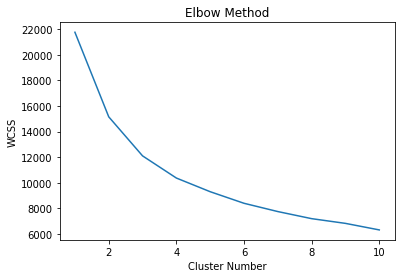

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [32]:
# berdasar output metode elbow, jumlah klaster optimal adalah 6

In [33]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

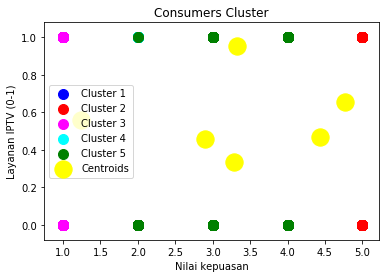

In [34]:
# Visualisasi hasil clusters
X = X.values
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Nilai kepuasan')
plt.ylabel('Layanan IPTV (0-1)')
plt.legend()
plt.show()

In [35]:
#!pip freeze > requeriments.txt